In [151]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('data/hotel_bookings.csv')

# Configuramos pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)  # None = mostrar todas
pd.set_option('display.width', None)       # Evitar salto de línea

# Mostrar las primeras filas para verificar
print(df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1       

In [152]:
# Mostrar las estadísticas descriptivas del DataFrame
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

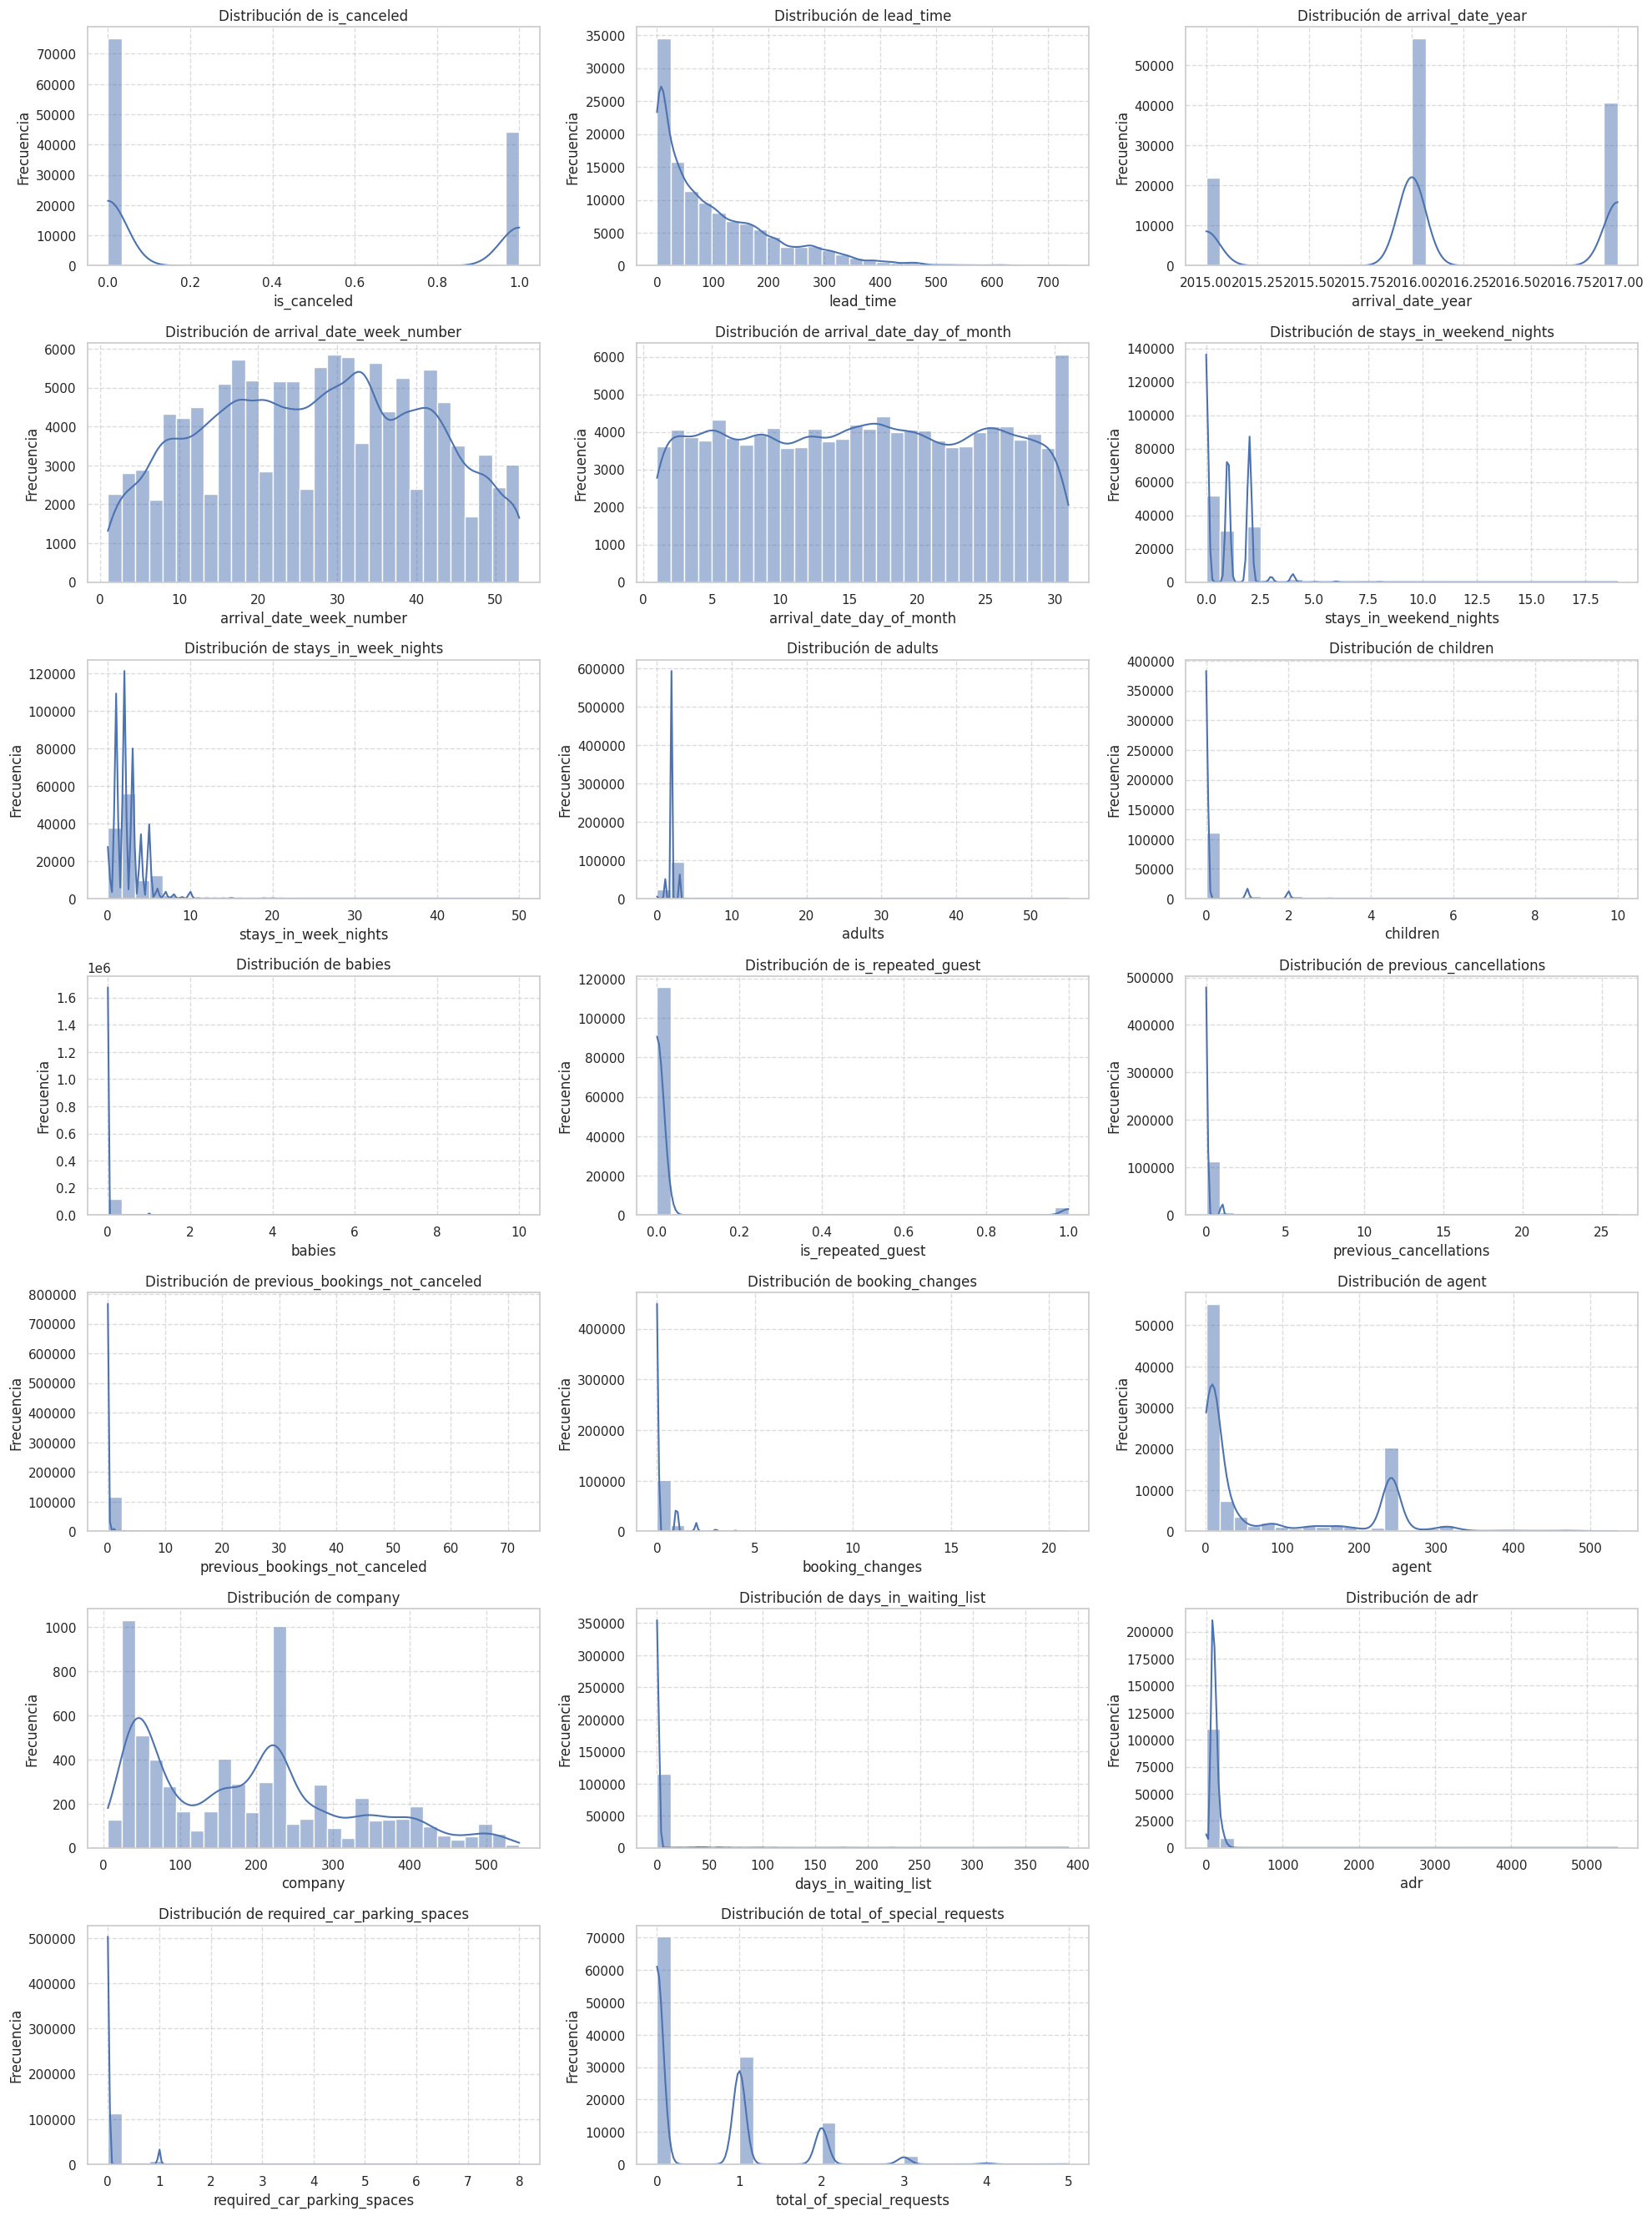

In [153]:
# Configuración de los gráficos
plt.figure(figsize=(20, 30))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Generar histogramas para cada columna numérica
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(8, 3, i)
    sns.histplot(df[column], kde=True, bins=30)  # KDE muestra la línea de densidad
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajustar el espaciado entre gráficos
plt.show()

In [154]:
# Mostrar información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [155]:
# Miramos valores nulos en el DataFrame
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [156]:
# Eliminamos la columna reservation status (es igual a la objetivo) 
df.drop(columns=['reservation_status'], inplace=True)

# Eliminamos columna company (muchos nulos)
df.drop(columns=['company'], inplace=True)
numeric_cols = numeric_cols.drop('company')

# Imputamos los valores nulos de la columna agent y children con la mediana
df['agent'] = df['agent'].fillna(df['agent'].median())
df['children'] = df['children'].fillna(df['children'].median())

# Imputamos los valores nulos de la columna country con la moda
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Volvemos a comprobar si hay valores nulos
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [157]:
# Mostrar los tipos de datos de cada columna
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [158]:
# Miramos valores duplicados en el DataFrame
print(df.duplicated().sum())

32022


In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols]) 

Muchos valores duplicados, por lo que deducimos que no se deben a confusiones y que son únicos. (No hay columnas identificativas)

Correlaciones fuertes (>0.5):
                    level_0                   level_1         0
3         arrival_date_year  arrival_date_week_number -0.540561
4  arrival_date_week_number         arrival_date_year -0.540561


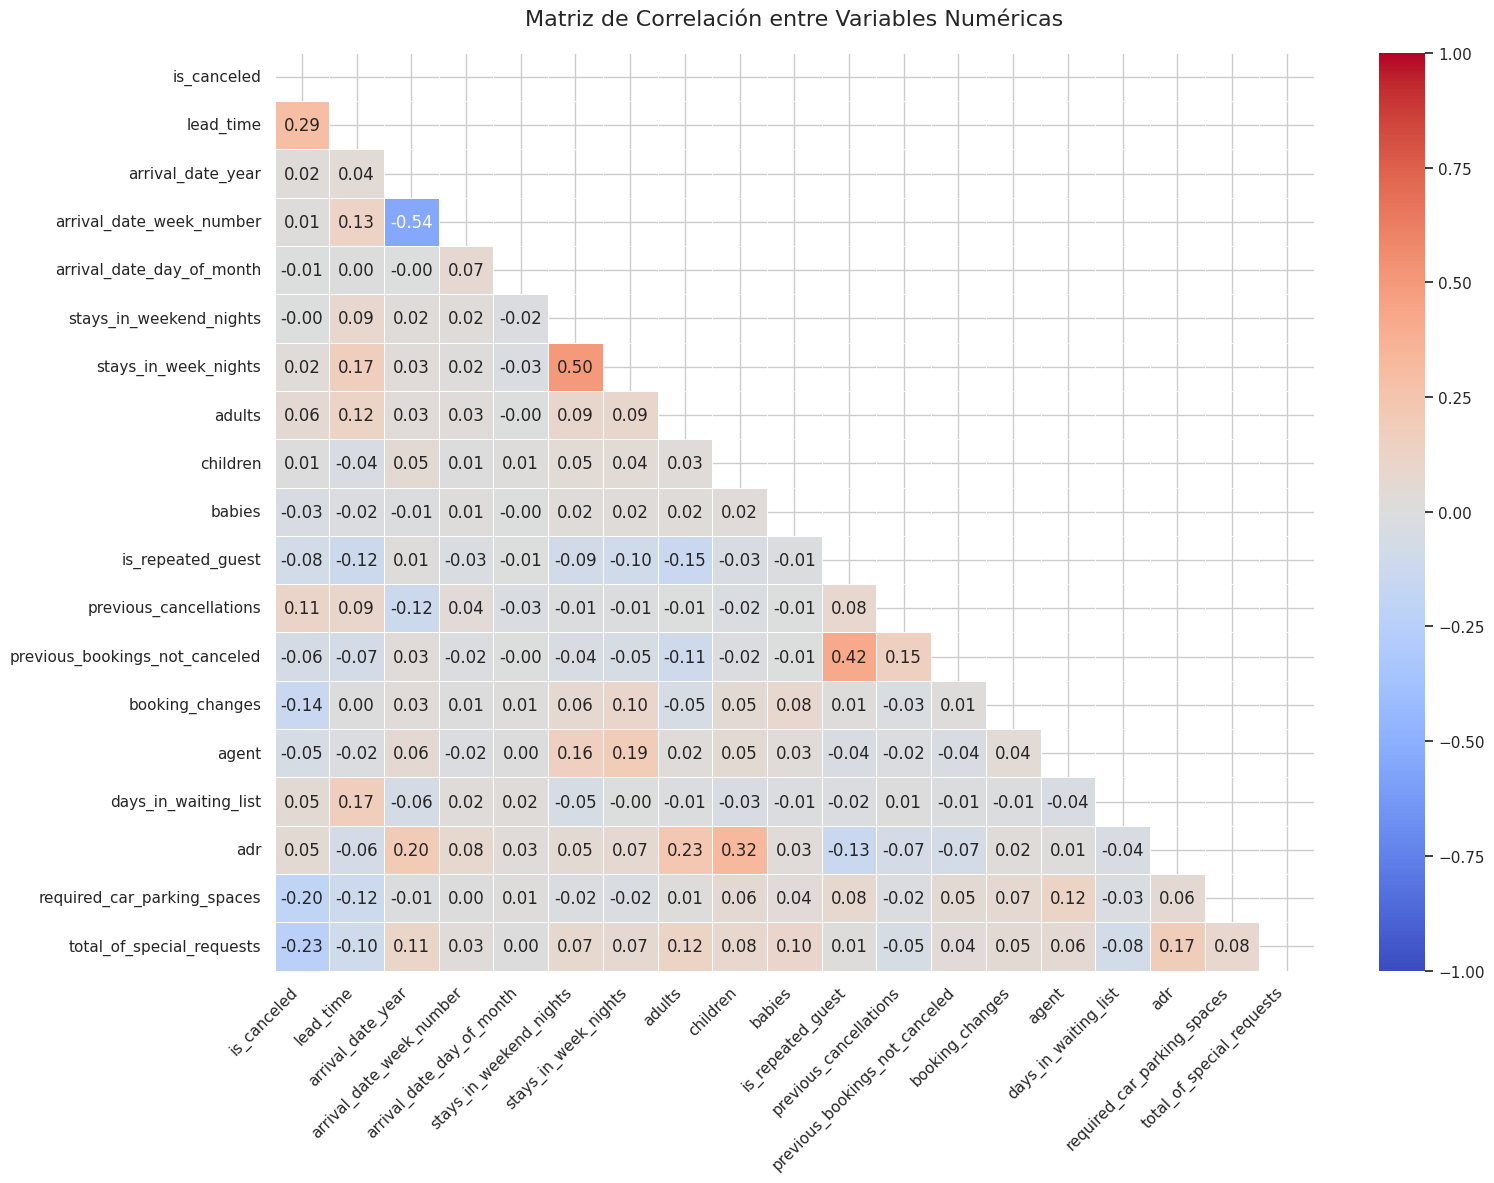

In [160]:
# Configuración de estilo
sns.set(style="whitegrid")

# Calcular matriz de correlación
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Filtrar correlaciones fuertes (opcional)
strong_corr = corr_matrix[abs(corr_matrix) > 0.5].stack().reset_index()
strong_corr = strong_corr[strong_corr['level_0'] != strong_corr['level_1']]  # Eliminar diagonal

print("Correlaciones fuertes (>0.5):")
print(strong_corr.sort_values(0, ascending=False).drop_duplicates())

# Heatmap de correlaciones
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para mostrar solo triángulo inferior

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5)

plt.title("Matriz de Correlación entre Variables Numéricas", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [161]:
from sklearn.model_selection import train_test_split

# Variable objetivo
target = 'is_canceled'

# Separar variables predictoras y objetivo
X = df.drop(columns=[target])
y = df[target]

# Dividir entre numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:

# Preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluación de modelos
results = []

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else [0] * len(y_test)
    
    # Métricas
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob) if hasattr(pipeline, "predict_proba") else None
    })

    print(f"\n{name} - Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier

# Evaluar todos
evaluate_model(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test, "Regresión Logística")
evaluate_model(DecisionTreeClassifier(random_state=42), X_train, y_train, X_test, y_test, "Árbol de Decisión")
evaluate_model(RandomForestClassifier(random_state=42), X_train, y_train, X_test, y_test, "Random Forest")
evaluate_model(GradientBoostingClassifier(random_state=42), X_train, y_train, X_test, y_test, "Gradient Boosting")
evaluate_model(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), X_train, y_train, X_test, y_test, "XGBoost")
# evaluate_model(LGBMClassifier(random_state=42), X_train, y_train, X_test, y_test, "LightGBM")
# evaluate_model(KNeighborsClassifier(), X_train, y_train, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(GaussianNB(), X_train, y_train, X_test, y_test, "Naive Bayes")

# Mostrar resultados
results_df = pd.DataFrame(results)
print("\nComparación de Modelos:")
print(results_df.sort_values(by='F1 Score', ascending=False))



Regresión Logística - Matriz de Confusión:
[[14030   877]
 [ 2148  6823]]

Árbol de Decisión - Matriz de Confusión:
[[13677  1230]
 [ 1277  7694]]

Random Forest - Matriz de Confusión:
[[14377   530]
 [ 1537  7434]]
